In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [15]:
# to see all gpu available in the system
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(len(gpus))     # to get number of gpu available

[]
0


In [17]:
# to see all cpu available in the system
cpus = tf.config.experimental.list_physical_devices('CPU')
print(cpus)
print(len(cpus))     # to get number of cpu available

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
1


In [20]:
data_dir='#######'
os.listdir(data_dir)

['cat', 'dog']

In [27]:
# to see number of files happy folder
print(len(os.listdir(os.path.join(data_dir,'cat'))))
# to see number of files happy folder
print(len(os.listdir(os.path.join(data_dir,'dog'))))

500
500


In [28]:
# immage extensions that work
image_exts = ['jpeg','jpg','bmp','png']

In [30]:
img = cv2.imread(os.path.join(data_dir,'dog', '00500-3846168662.png'))
print(img)

[[[252 254 241]
  [254 254 240]
  [254 253 239]
  ...
  [ 82 110 142]
  [ 84 111 143]
  [ 86 110 140]]

 [[255 253 240]
  [255 253 240]
  [255 251 240]
  ...
  [ 85 110 141]
  [ 85 111 140]
  [ 84 111 141]]

 [[254 251 239]
  [255 252 240]
  [254 251 240]
  ...
  [ 83 110 140]
  [ 82 110 139]
  [ 84 110 142]]

 ...

 [[153 163 175]
  [145 156 169]
  [143 154 167]
  ...
  [  9   6   5]
  [  6   5   4]
  [  8   7   4]]

 [[146 160 171]
  [140 156 166]
  [145 156 169]
  ...
  [  7   6   5]
  [  8   4   3]
  [ 10   9   6]]

 [[144 155 168]
  [142 155 167]
  [152 160 175]
  ...
  [  8   5   5]
  [  9   4   5]
  [  9   8   5]]]


(512, 512, 3)


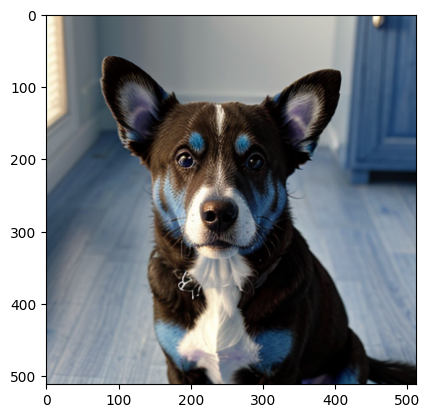

In [41]:
plt.imshow(img)
print(img.shape)

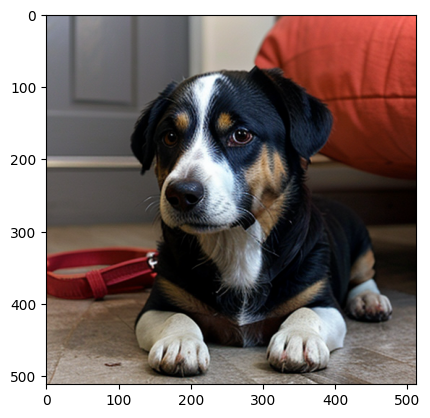

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
# looping through each image to remove bad images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)

In [45]:
# builds a data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1000 files belonging to 2 classes.


In [46]:
# allows us to access the pipeline
data_iterator = data.as_numpy_iterator()

In [47]:
# accessing the pipeline
batch = data_iterator.next()

In [48]:
batch

(array([[[[157.25, 149.75, 138.  ],
          [156.75, 149.  , 138.  ],
          [157.  , 149.75, 137.75],
          ...,
          [199.5 , 211.5 , 217.  ],
          [200.  , 212.25, 216.5 ],
          [200.  , 212.  , 217.25]],
 
         [[156.75, 149.25, 137.25],
          [156.75, 149.5 , 137.5 ],
          [157.  , 149.5 , 137.5 ],
          ...,
          [202.25, 215.5 , 220.25],
          [202.5 , 215.25, 221.  ],
          [203.5 , 214.25, 221.  ]],
 
         [[156.75, 149.  , 137.5 ],
          [157.  , 149.25, 138.  ],
          [157.  , 149.  , 137.5 ],
          ...,
          [197.75, 211.  , 216.75],
          [196.75, 210.75, 217.  ],
          [196.25, 209.5 , 215.5 ]],
 
         ...,
 
         [[168.75, 120.25, 107.75],
          [169.  , 116.  , 103.75],
          [129.5 ,  78.25,  71.75],
          ...,
          [209.5 , 157.5 , 152.  ],
          [206.25, 156.75, 150.75],
          [205.  , 156.75, 149.75]],
 
         [[162.75, 110.25, 107.25],
          [1

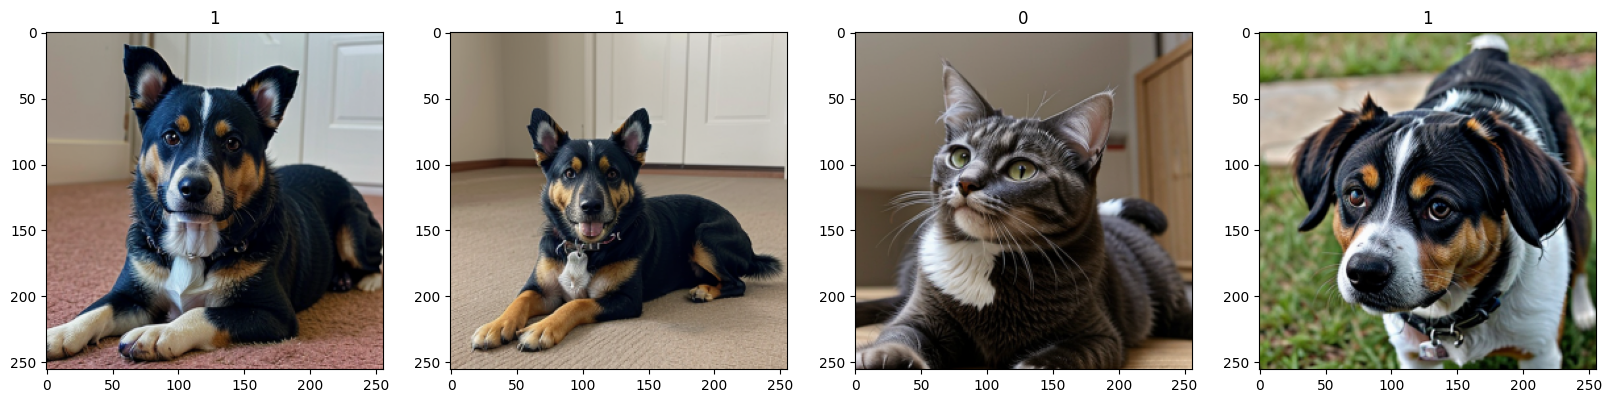

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# the above command shows
# 1- dog
# 0 - cat

Preprocessing Data

In [50]:
scaled = batch[0] / 255
scaled

array([[[[0.6166667 , 0.5872549 , 0.5411765 ],
         [0.61470586, 0.58431375, 0.5411765 ],
         [0.6156863 , 0.5872549 , 0.54019606],
         ...,
         [0.7823529 , 0.82941175, 0.8509804 ],
         [0.78431374, 0.83235294, 0.8490196 ],
         [0.78431374, 0.83137256, 0.8519608 ]],

        [[0.61470586, 0.5852941 , 0.5382353 ],
         [0.61470586, 0.5862745 , 0.5392157 ],
         [0.6156863 , 0.5862745 , 0.5392157 ],
         ...,
         [0.79313725, 0.845098  , 0.8637255 ],
         [0.7941176 , 0.84411764, 0.8666667 ],
         [0.7980392 , 0.8401961 , 0.8666667 ]],

        [[0.61470586, 0.58431375, 0.5392157 ],
         [0.6156863 , 0.5852941 , 0.5411765 ],
         [0.6156863 , 0.58431375, 0.5392157 ],
         ...,
         [0.7754902 , 0.827451  , 0.85      ],
         [0.77156866, 0.8264706 , 0.8509804 ],
         [0.76960784, 0.8215686 , 0.845098  ]],

        ...,

        [[0.6617647 , 0.4715686 , 0.422549  ],
         [0.6627451 , 0.45490196, 0.40686274]

In [51]:
scaled.min()

0.0

In [52]:
scaled.max()

1.0

In [57]:
# scaling data
data = data.map(lambda x,y: (x/255, y))

In [58]:
scaled_iterator = data.as_numpy_iterator()
# does shuffling

In [59]:
batch = scaled_iterator.next()

In [60]:
batch[0].max()

1.0

In [61]:
batch[0].min()

0.0

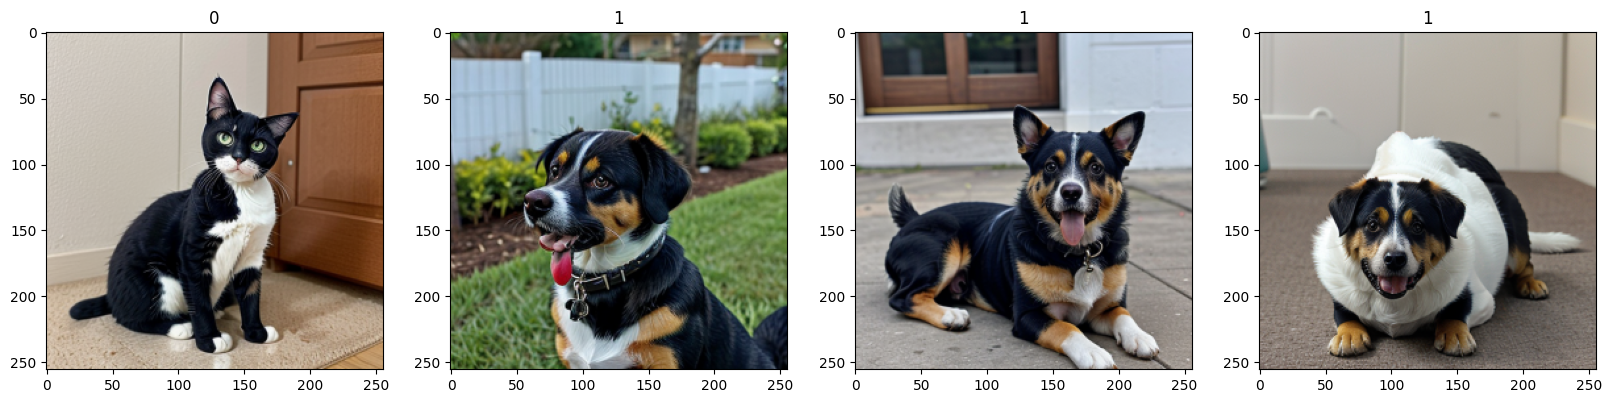

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [63]:
len(data)

32

In [64]:
train_size = int(len(data)*.7)   # taining set
val_size = int(len(data)*.2) + 1  # validation set
test_size = int(len(data)*.1) + 1  # testing set

In [65]:
train_size

22

In [66]:
val_size

7

In [67]:
test_size

4

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

Deep Learning Model

In [108]:
model = Sequential()

In [109]:
# other way
# more readable and clean
# 16- filters
# 3x3 size filters
# 1 - stride

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
# adam - optimizer
# defining losses
# binary classification
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [83]:
logdir = 'logs'

In [84]:
# callback important if we want to save the model at a particular checkpoint
# seeing the model
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
# 2 important methods of building a neural network
# model.fit - fit is a training component
# model.predict - it is used when we actually go and make predictions
# one epoch is how much time will we train for
# epoch is one run over our entire set of data

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5510 - loss: 1.4740 - val_accuracy: 0.4375 - val_loss: 0.6946
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5927 - loss: 0.6822 - val_accuracy: 0.6652 - val_loss: 0.6157
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7363 - loss: 0.5623 - val_accuracy: 0.7768 - val_loss: 0.4731
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8373 - loss: 0.3970 - val_accuracy: 0.9018 - val_loss: 0.3081
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8513 - loss: 0.3510 - val_accuracy: 0.8393 - val_loss: 0.3365
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9180 - loss: 0.2458 - val_accuracy: 0.8884 - val_loss: 0.2949
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9593 - loss: 0.1757 - val_accuracy: 0.9420 - val_loss: 0.1816
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9774 - loss: 0.0882 - val_accuracy: 0.9688 - val_loss: 0.1012
Epo

In [113]:
hist.history

{'accuracy': [0.5411931872367859,
  0.6505681872367859,
  0.7443181872367859,
  0.8366477489471436,
  0.8622159361839294,
  0.9090909361839294,
  0.9517045617103577,
  0.9644886255264282,
  0.9928977489471436,
  0.9886363744735718],
 'loss': [1.0322067737579346,
  0.6714560389518738,
  0.5369795560836792,
  0.3797532916069031,
  0.3300396800041199,
  0.2682226896286011,
  0.17823663353919983,
  0.10048356652259827,
  0.05770393833518028,
  0.0422205850481987],
 'val_accuracy': [0.4375,
  0.6651785969734192,
  0.7767857313156128,
  0.9017857313156128,
  0.8392857313156128,
  0.8883928656578064,
  0.9419642686843872,
  0.96875,
  0.9598214030265808,
  0.96875],
 'val_loss': [0.6945919394493103,
  0.6156813502311707,
  0.4731362462043762,
  0.3081088364124298,
  0.3365207314491272,
  0.2948574423789978,
  0.18157418072223663,
  0.10116425901651382,
  0.11245889961719513,
  0.11840852349996567]}

Plot Performance

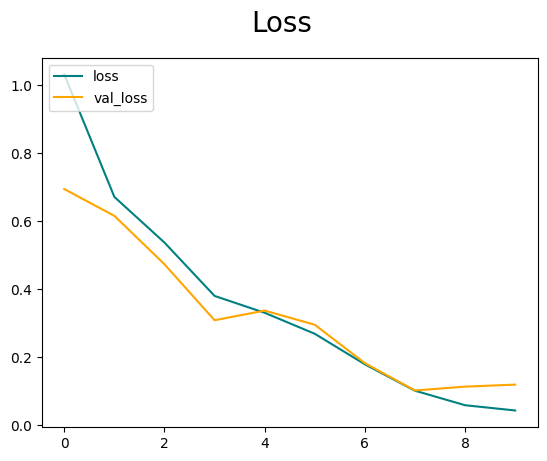

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

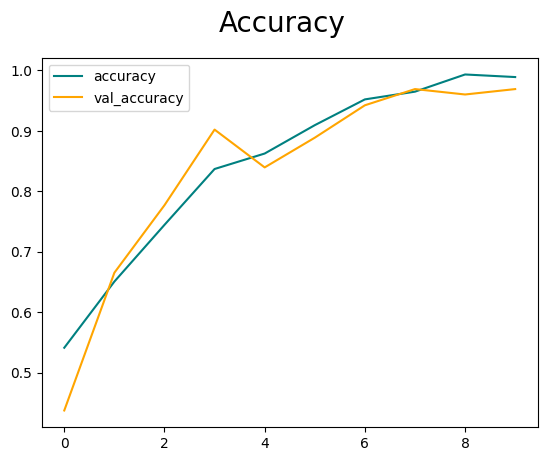

In [115]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [89]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [116]:
# metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [117]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


2024-09-04 11:25:38.360014: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [118]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:0.9538461565971375, Recall:0.96875, Accuracy:0.9609375


Testing

In [93]:
import cv2

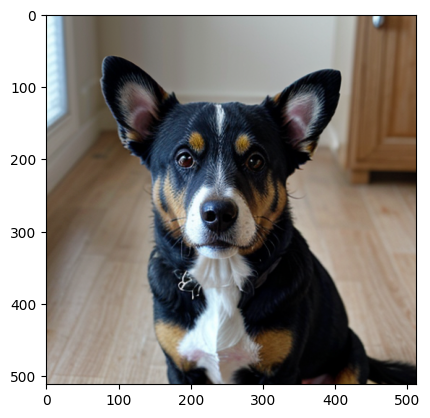

In [119]:
# dog test
img = cv2.imread(os.path.join(data_dir,'dog', '00500-3846168662.png'))
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

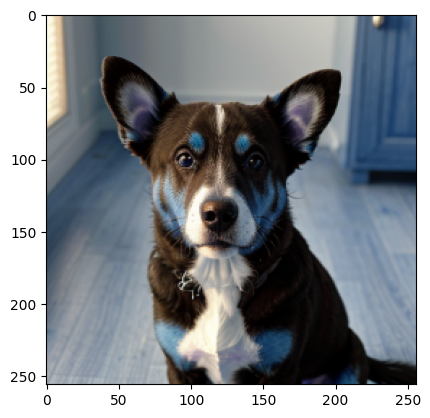

In [120]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [121]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [122]:
yhat

array([[0.99903697]], dtype=float32)

In [123]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


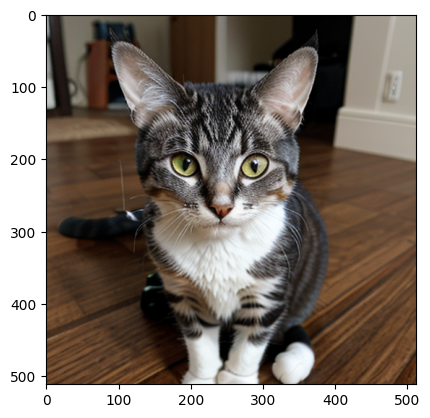

In [124]:
# cat test
img = cv2.imread(os.path.join(data_dir,'cat', '00000-4122619873.png'))
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

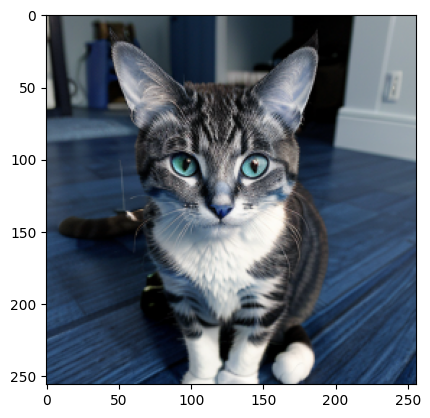

In [125]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [126]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [127]:
yhat

array([[0.00605247]], dtype=float32)

In [128]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


Saving the model

In [129]:
from tensorflow.keras.models import load_model

In [130]:
# .h is a serialization format
model.save(os.path.join('models','catdogmodel.h5'))

In [131]:
new_model = load_model(os.path.join('models','catdogmodel.h5'))

In [132]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [133]:
if yhatnew > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


Another Save Model

In [136]:
#Another save model
export_path = "my_model/1"
tf.saved_model.save(model,export_path)

INFO:tensorflow:Assets written to: my_model/1/assets


INFO:tensorflow:Assets written to: my_model/1/assets
